<a href="https://colab.research.google.com/github/Ava100rav/NASA_Airfoil_Self-Noise/blob/main/2_NASA_Airfoil_Self_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NASA Airfoil Self-Noise Dataset

A series of aerodynamic and acoustic tests of two and three-dimensional airfoils

In [ ]:
# dataset - https://www.kaggle.com/fedesoriano/airfoil-selfnoise-dataset

CONTEXT

NASA dataset obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel. 

Content

The NASA data set comprises different size NACA 0012 airfoils (n0012-il) at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

Attribute Information:

In [ ]:
# Input features:








1. f: Frequency in Hertzs [Hz].
2. alpha: Angle of attack (AoA, α), in degrees [°].
3. c: Chord length, in meters [m].  
4. U_infinity: Free-stream velocity, in meters per second [m/s].  
5. delta: Suction side displacement thickness (𝛿), in meters [m]. 


---









output:

SSPL: Scaled sound pressure level, in decibels [dB].

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style 

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/28 feb/AirfoilSelfNoise.csv')
df.head(3)

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951


In [ ]:
df.shape

(1503, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   f           1503 non-null   int64  
 1   alpha       1503 non-null   float64
 2   c           1503 non-null   float64
 3   U_infinity  1503 non-null   float64
 4   delta       1503 non-null   float64
 5   SSPL        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [ ]:
df['U_infinity'].nunique()

4

In [ ]:
df['U_infinity'].value_counts()

39.6    480
71.3    465
31.7    281
55.5    277
Name: U_infinity, dtype: int64

In [ ]:
df['delta'].nunique()

105

In [ ]:
df['alpha'].nunique()

27

In [ ]:
df['c'].nunique()

6

In [ ]:
df['f'].nunique()

21

In [ ]:
df['SSPL'].nunique()

1456

In [ ]:
dup=df.duplicated().sum()
dup

0

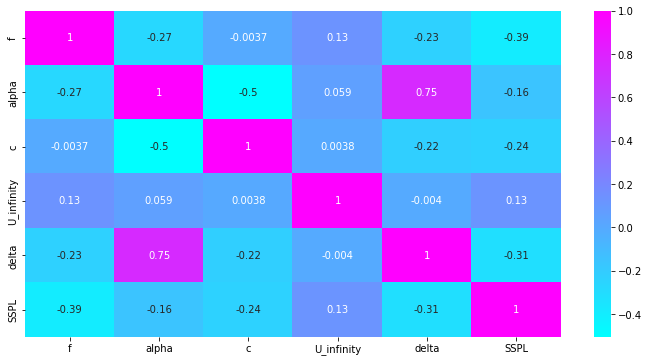

In [ ]:
figure = plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True,cmap=plt.cm.cool)

In [ ]:
 # as alpha correlation value with delta is 0.75, thought of dropping alpha but test value decreases
 #df.drop('alpha',axis=1,inplace=True)

In [ ]:
# this even decreases more
#df.drop('delta',axis=1,inplace=True)

In [ ]:
#df.drop('c',axis=1,inplace=True)
#every single value tried, but for reg it goes 0.3, and for other 0.7

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


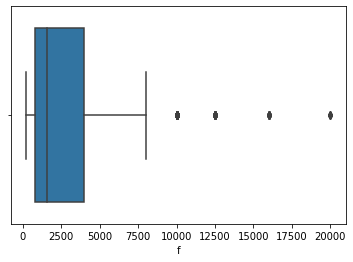

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


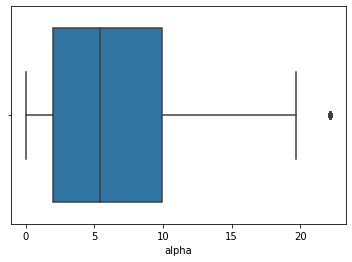

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


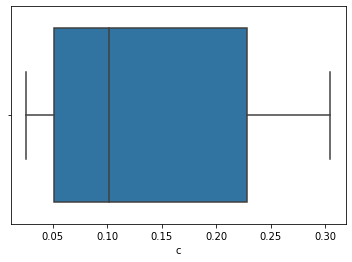

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


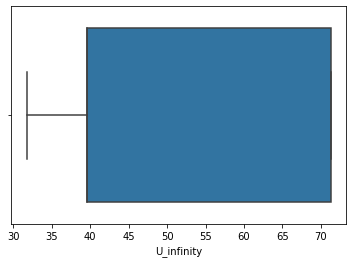

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


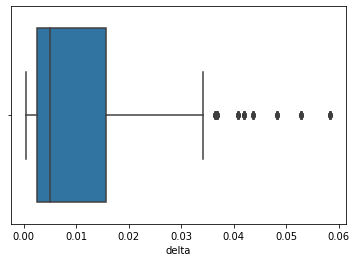

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


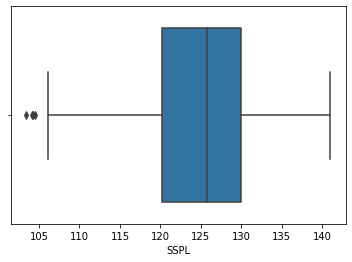

In [ ]:
cols = ['f','alpha', 'c', 'U_infinity', 'delta', 'SSPL']                  #--->>> column of which you want to see outlier, include them
for i in cols:
    sns.boxplot(df[i])
    plt.show(); 

In [ ]:
df2=df
df.shape

(1503, 6)

In [ ]:
colm=['delta']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


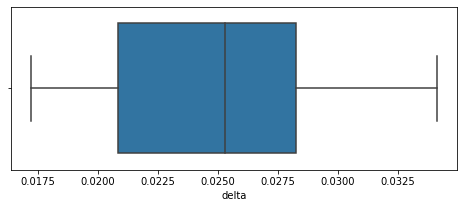

In [ ]:
for i in colm:
  q1 = np.percentile(df[i], 25)
  q3 = np.percentile(df[i], 75)

  iqr = q3 -q1
  lower = np.abs(q1 - (1.5 * iqr))
  upper = np.abs(q3 + (1.5 * iqr))
  #print(lower, upper)
  df1 = df[(df[i] > upper) | (df[i] < lower)]
  indexs = df1.index
  df2.drop(indexs, axis = 0, inplace = True)
  plt.figure(figsize = (8,3))
  sns.boxplot(df2[i])
  plt.show()



In [ ]:
# Copy all the predictor variables into X dataframe
X = df.drop('SSPL', axis=1)
# Copy target into the y dataframe.This is the dependent variable
y = df[['SSPL']]
X.head()

,f,alpha,c,U_infinity,delta
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [ ]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import  train_test_split
# Split X and y into training and test set in 65:35 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35 , random_state=10)

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import  LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_train, y_train)

0.5184657505374239

In [ ]:
regression_model.score(X_test, y_test)

0.5083288266933046

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(max_depth=25)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25)

In [ ]:
dtree.score(X_train, y_train)

1.0

In [ ]:
dtree.score(X_test, y_test)

0.8651931692068067

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
m = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
m.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8955058522547416

In [ ]:
m.score(X_test, y_test)

0.8418454764479295